## Clustering countries into different Segments based on certain characteristics

In [1]:
#Importing all the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")


from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

#Packages required for Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

## PART - I 
## Data Importing and Cleaning
- Import Data
- Understand the size and data distribution
- Column Transformation
- Check for duplicates
- Check for missing values
- Check for outliers
- Correlation among variables in the dataset

### Importing the data and understanding it

In [2]:
#Importig the Dataset
country = pd.read_csv(r'C:\Users\Shravan\Desktop\Data\Clustering and PCA Assignment\Country-data.csv')
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
country.shape

(167, 10)

In [4]:
#Getting information regarding the column values
country.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


### Column Transformations

In [5]:
#Converting the columns that are in percentage to their absolute values
country['health'] = (country['health']*country['gdpp'])/100
country['imports'] = (country['imports']*country['gdpp'])/100
country['exports'] = (country['exports']*country['gdpp'])/100
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


### Checking for Outliers

In [6]:
#Getting information regarding the column values
country.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000


- Here we see that the maximum values of each column looks valid when the 99th percentile and max value are compared. 
- Also, removing outliers or capping the maximum value will bias the data as we are looking at data of countries. So if there is something that is an extreme value that should be left as is. This would help us in understanding those countires with dire need of help
- So, we will keep these values as they are and proceed with our analysis

### Checking for Missing Values 

In [7]:
#Checking for null values
round(100*(country.isnull().sum()/len(country.index)), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

- Here we see that there are no missing values in our datatset

### Checking for duplicate rows

In [8]:
print(country.duplicated().value_counts())

False    167
dtype: int64


- Hence we can conclude that we do not have any duplicate rows in our dataframe

### Finding correlation among the variables of the dataset

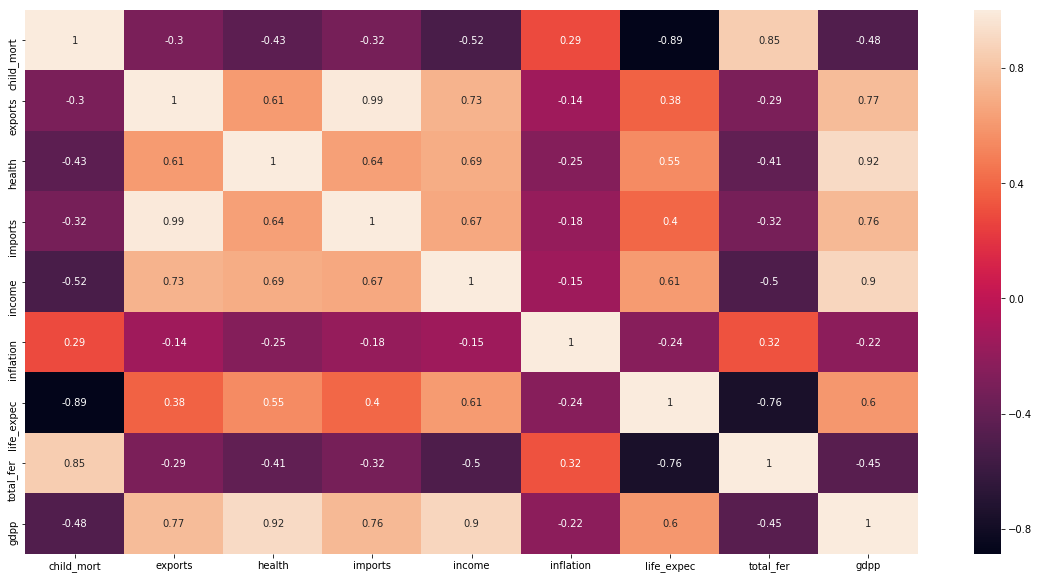

In [9]:
#Trying to plot the correlation among the variables
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(country.corr(),annot = True)

- Here we see that there is a good amount of correlation among the variables of the dataset. So, in order to reduce the correlation and the dimensions we will do PCA analysis next

## Part - II
## PCA

- Scaling the data
- Fit PCA on the data
- Get the explained variance ratio and the Scree plot
- Finalize on the number of components to be considered
- Create our dataset with PCA
- Plot correlation and check if the correlation has reduced

### Standard Scaling the data

In [10]:
#Before applying the PCA to our data, we need to standardize our data

col = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp',]

scaler = StandardScaler()
country[col] = scaler.fit_transform(country[col])

In [11]:
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,-2.659217e-17,9.174298e-17,-2.260334e-17,3.589943e-17,-7.512288e-17,8.376533e-17,3.616535e-16,3.124580e-16,2.127373e-17
std,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00
min,-8.871383e-01,-4.140371e-01,-5.812404e-01,-4.491604e-01,-8.603259e-01,-1.137852e+00,-4.337186e+00,-1.191250e+00,-6.968005e-01
25%,-7.466190e-01,-3.891452e-01,-5.446513e-01,-4.055539e-01,-7.174558e-01,-5.666409e-01,-5.927576e-01,-7.639023e-01,-6.366596e-01
50%,-4.717981e-01,-3.149097e-01,-4.091560e-01,-3.097338e-01,-3.738080e-01,-2.269504e-01,2.869576e-01,-3.564309e-01,-4.544309e-01
75%,5.926666e-01,-7.958645e-03,-4.442811e-02,7.713036e-02,2.942370e-01,2.816364e-01,7.042584e-01,6.175252e-01,5.942100e-02
max,4.221297e+00,9.839814e+00,4.235432e+00,9.716681e+00,5.611542e+00,9.129718e+00,1.380962e+00,3.009349e+00,5.036507e+00


- Uptil now, we have checked for outliers, missing values and we have standardized our data in order to get similar standard deviation for all of our columns so that we can go ahead and use PCA on this data

### Fitting the first iteration of PCA on our data

In [12]:
#Doing a PCA on the above data
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [13]:
#Fitting it to our data
pca.fit(country[col])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [14]:
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

### Getting the explained variance ratio

In [15]:
#Checking explained variance ratios for the components we got above
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

In [16]:
print(type(pca))

<class 'sklearn.decomposition.pca.PCA'>


### Scree Plot of Principal Components

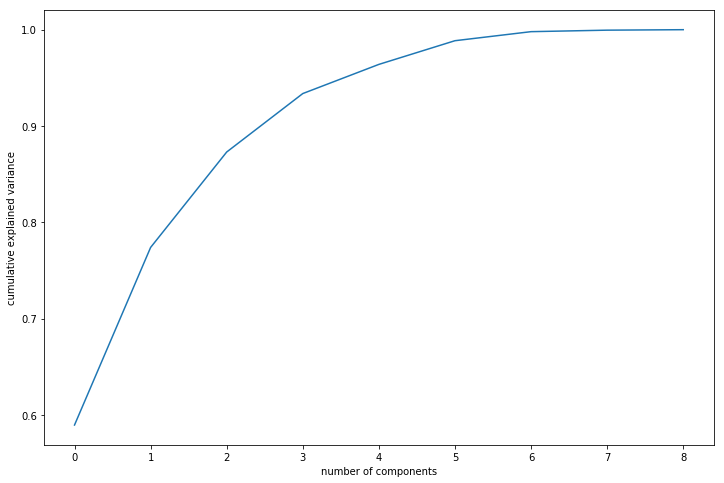

In [17]:
#Plotting the scree plot
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

- Here we see that the 5 components are good enough to consider as they are explaining a variance of close to 96-98%

In [18]:
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':col})
pcs_df

,PC1,PC2,Feature
0,-0.316392,0.476267,child_mort
1,0.342887,0.397311,exports
2,0.358535,0.155053,health
3,0.344865,0.370781,imports
4,0.380041,0.128384,income
5,-0.143085,0.221261,inflation
6,0.343857,-0.369820,life_expec
7,-0.302842,0.459715,total_fer
8,0.399988,0.200624,gdpp


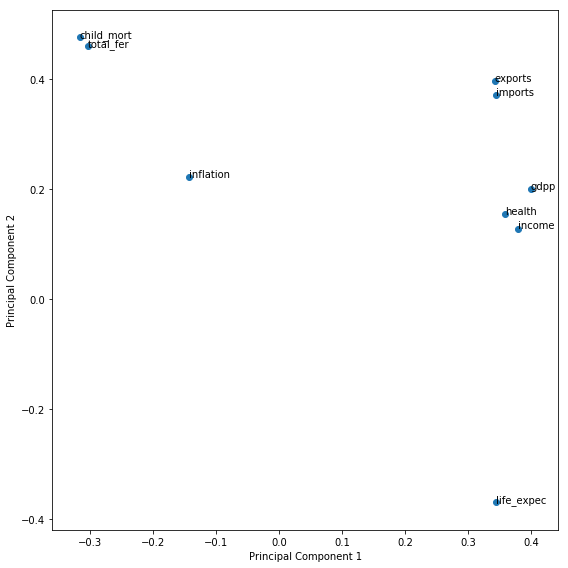

In [19]:
#PLot the first two Principal Components
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

### Fitting the Final PCA using 5 components

In [20]:
#Fitting the final PCA on the data using 5 components and Incremental PCA
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=5)

In [21]:
#Fitting the PCA on our data
country_pca = pca_final.fit_transform(country[col])
country_pca

array([[-2.63633780e+00,  1.47225984e+00, -5.48330498e-01,
         2.38302128e-01,  6.10029273e-02],
       [-2.37829162e-02, -1.43553539e+00, -1.54701978e-02,
        -4.28278354e-01, -1.54305141e-01],
       [-4.59228259e-01, -6.79704711e-01,  9.56536815e-01,
        -1.93531315e-01, -9.21275020e-02],
       [-2.72347181e+00,  2.17496646e+00,  5.97396852e-01,
         4.17695067e-01,  5.66944470e-02],
       [ 6.49103499e-01, -1.02640436e+00, -2.58645163e-01,
        -2.76882415e-01,  7.70873177e-02],
       [ 3.59501355e-02, -6.85691881e-01,  1.46841882e+00,
         4.60321765e-02, -9.31926507e-02],
       [-3.34457119e-01, -1.27861656e+00,  1.90805480e-01,
        -4.77018594e-01, -2.53557140e-01],
       [ 3.18403890e+00, -2.39407303e-01, -1.31692434e-01,
         1.67437937e+00,  8.73676249e-02],
       [ 3.81774167e+00,  2.62449000e-01, -2.58554292e-01,
         1.02465750e+00, -2.99611118e-01],
       [-4.68004699e-01, -4.93948233e-01,  6.11513868e-01,
        -2.76290913e-01

In [22]:
country_pca.shape

(167, 5)

- Earlier we had country dataframe with 167 rows and 9 numeric columns and using PCA we have reduced the number of dimensions to 5. However, the rows or the countries i.e., 167 rows remain intact

In [23]:
print(type(country_pca))

<class 'numpy.ndarray'>


### Finding the correlation after PCA

In [24]:
#Transposing the PCA array
country_pca_tp = np.transpose(country_pca)

In [25]:
#Finding the minimum and maximum correlation values after PCA
corrmat = np.corrcoef(country_pca_tp)
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 0.04750100962092804 , min corr:  -0.013777413350895896


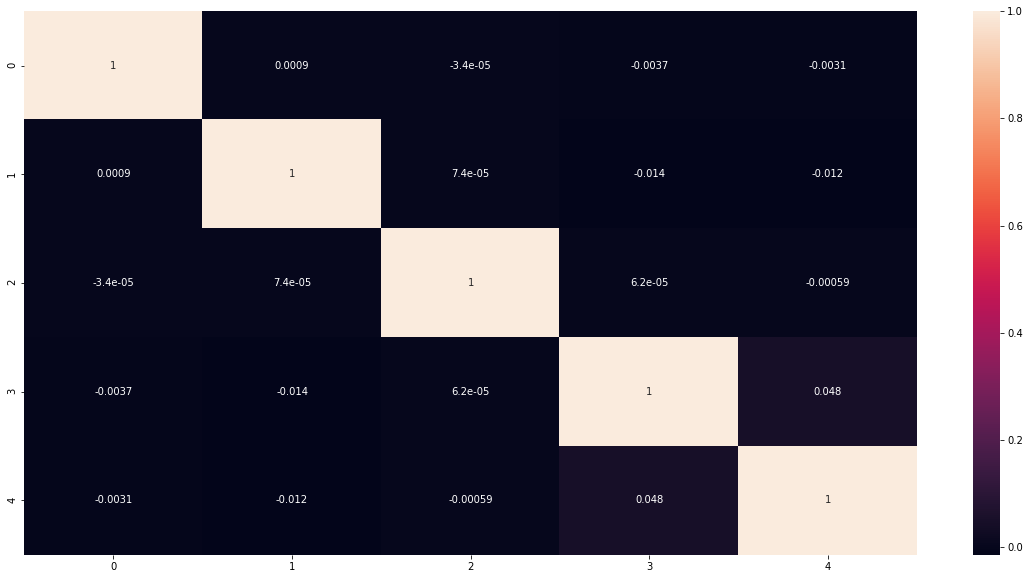

In [26]:
#PLotting Correlation
plt.figure(figsize = (20,10))
sns.heatmap(np.corrcoef(country_pca_tp),annot = True)

- Here we also observe that the correlation among our variables after doing a PCA has almost become 0

In [27]:
#Converting our PCA numpy array into a dataframe
country_pca_df = pd.DataFrame({'PC1':country_pca_tp[0],'PC2':country_pca_tp[1],'PC3':country_pca_tp[2],'PC4':country_pca_tp[3],'PC5':country_pca_tp[4]})
country_pca_df.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.636338,1.472260,-0.548330,0.238302,0.061003
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128
3,-2.723472,2.174966,0.597397,0.417695,0.056694
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087


- Using the dataset we got above through PCA, we will try creating clusters

## Part - IIIA
## Clustering Analysis

- Calculate the Hopkins Statistic for the dataframe
- K-Means Clustering
- Plot the elbow curve
- Calculate the Silhouette Score
- Finlize the number of clusters necessary and form the cluster using our cleaned dataset
- Plot the clusters against GDPP, Income and Child Mortality to see if the clusters make sense

### HopkinsTest

In [28]:
#Calculating the Hopkins statistic
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [29]:
#Checking Hopkin's Statistic to understand if our dataset can give good clusters
hopkins(country_pca_df)

0.9478627873124431

- Here we see that the Hopkins Test is giving us a good score indicating that our dataset got after PCA can be used to obtain menaingful clusters

### Plotting the Elbow Curve

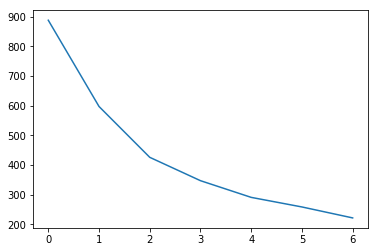

In [30]:
#Let us first start with K means Clustering and plot the elbow curve to understand how many clusters we need to consider
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country_pca_df)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

- Here we see that after 3 clusters the slope is not changing much indicating that the number of clusters to be considered should be 3. Now, let us also look at the Silhouette score inorder to understand which number of clusters is better

### Calculating the Silhouette Score

In [31]:
#Let us now also calculate the Silhouette Score to find out which cluster number has the value closest to 1
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country_pca_df)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = round(silhouette_score(country_pca_df, cluster_labels),4)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4807
For n_clusters=3, the silhouette score is 0.4542
For n_clusters=4, the silhouette score is 0.4602
For n_clusters=5, the silhouette score is 0.465
For n_clusters=6, the silhouette score is 0.3341
For n_clusters=7, the silhouette score is 0.3592
For n_clusters=8, the silhouette score is 0.339


- From the Silhouette score, we see that 3 clusters has a decent score. Though it is not the highest score, let us go ahead with 3 clusters and check how the clusters look like

### Creating the final K-Means Clustering

In [32]:
# final model with k=4
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(country_pca_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [33]:
#Assigning the lables to the dataframe
country_pca_df['cluster_id'] = kmeans.labels_
country_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,cluster_id
0,-2.636338,1.472260,-0.548330,0.238302,0.061003,0
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,1
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,1
3,-2.723472,2.174966,0.597397,0.417695,0.056694,0
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087,1


In [34]:
ClusterID = pd.DataFrame(country_pca_df.cluster_id)

In [35]:
#Joining the cluster_id back to the countries to understand how the clustering looks like
cluster = country.join(ClusterID)
cluster.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180,0
1,Albania,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,1
2,Algeria,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376,1
3,Angola,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268,0
4,Antigua and Barbuda,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817,1


In [36]:
#Checking the countries that fall in a cluster
clusterid = [0,1,2]
for i in clusterid:
    x = cluster[cluster.cluster_id == i]
    print(x)

                      country  child_mort   exports    health   imports  \
0                 Afghanistan    1.291532 -0.411011 -0.565040 -0.432276   
3                      Angola    2.007808 -0.291375 -0.532363 -0.345953   
17                      Benin    1.808842 -0.404030 -0.571075 -0.429979   
21                   Botswana    0.353908 -0.259599 -0.294923 -0.227100   
25               Burkina Faso    1.933196 -0.407937 -0.566801 -0.437600   
26                    Burundi    1.376093 -0.412947 -0.573459 -0.443031   
28                   Cameroon    1.734230 -0.397868 -0.550961 -0.425089   
31   Central African Republic    2.753928 -0.411160 -0.578496 -0.441146   
32                       Chad    2.778798 -0.395677 -0.565754 -0.422601   
36                    Comoros    1.241791 -0.407017 -0.569069 -0.422098   
37           Congo, Dem. Rep.    1.933196 -0.406437 -0.573669 -0.437910   
38                Congo, Rep.    0.637434 -0.283978 -0.550849 -0.347015   
40              Cote d'Iv

### Plotting the GDPP, Income & Child Mortality for the different clusters got through K Means

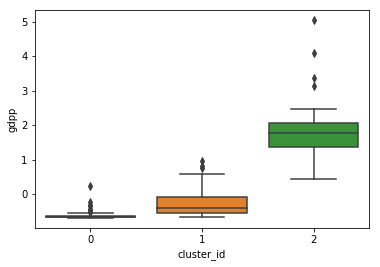

In [37]:
#PLotting graphs for gdpp, child_mort and income for all the clusters
sns.boxplot(x='cluster_id', y='gdpp', data=cluster)

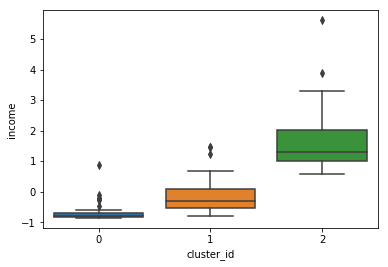

In [38]:
sns.boxplot(x='cluster_id', y='income', data=cluster)

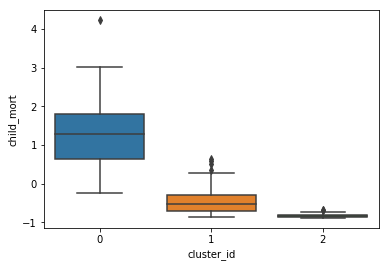

In [39]:
sns.boxplot(x='cluster_id', y='child_mort',data=cluster)

- The clusters that we got from the K Means clustering above makes sense. From cluster 0 to cluster 2 the GDPP and Income are increasing, while the child mortality rate is going down
- Cluster 0 represents countries that are under developed, cluster 1 represents the developing countries and cluster 2 represents the developed countries

## Part - IIIB 
## Hierarchical Clustering

- Try Single and Complete linkage Hierarchical Clustering
- Decide the number of clusters
- Plot boxplots and check how the clusters got through Hierarchical Clustering are performing

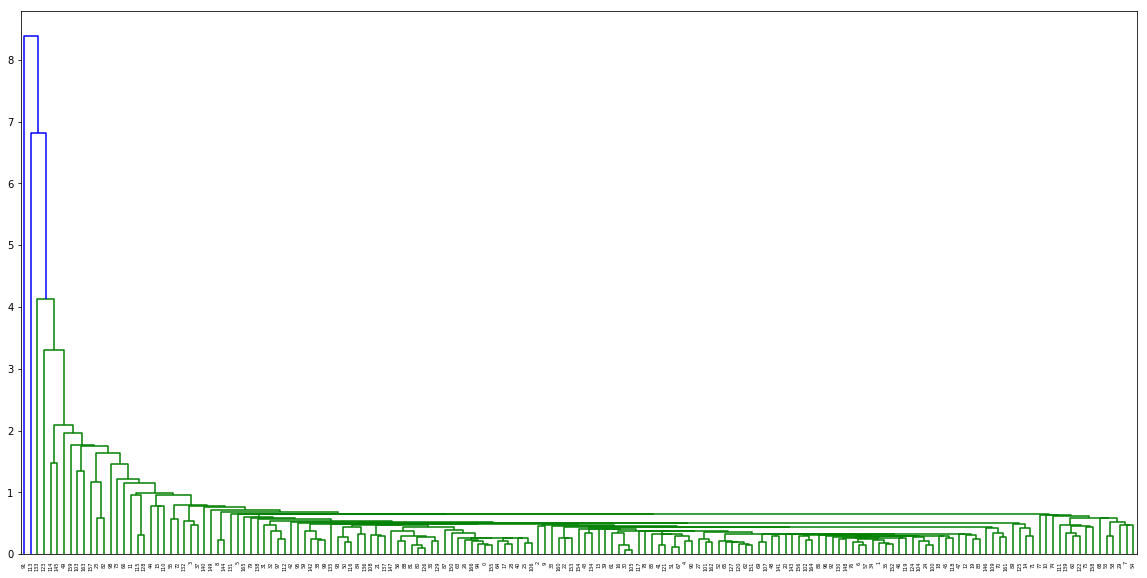

In [40]:
#Hierarchical Clustering using single linkage method
country_pca_hc = country_pca_df.drop('cluster_id',axis=1,inplace=False)
country_pca_hc.head()
plt.figure(figsize = (20,10))
mergings_single = linkage(country_pca_hc, method="single", metric='euclidean')
dendrogram(mergings_single)
plt.show()

In [41]:
hier_sing_clus = cut_tree(mergings_single, n_clusters=3).reshape(-1, )
hier_sing_clus

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [42]:
country_pca_df['HSCluster_ID'] = hier_sing_clus
country_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,cluster_id,HSCluster_ID
0,-2.636338,1.472260,-0.548330,0.238302,0.061003,0,0
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,1,0
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,1,0
3,-2.723472,2.174966,0.597397,0.417695,0.056694,0,0
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087,1,0


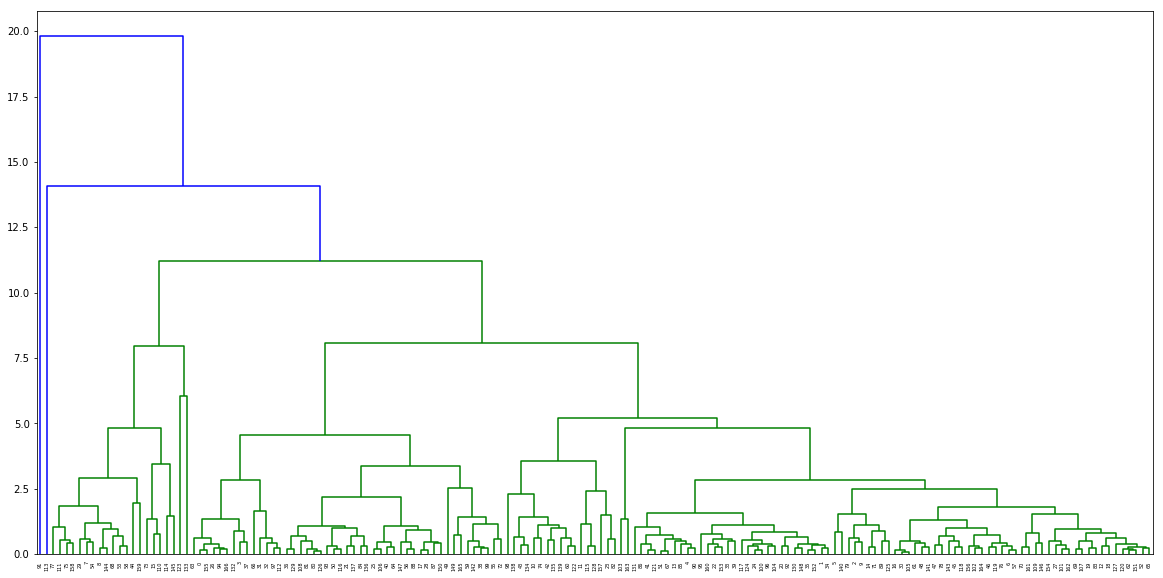

In [43]:
#Hierarchical Clustering using complete linkage
plt.figure(figsize = (20,10))
mergings_complete = linkage(country_pca_hc, method="complete", metric='euclidean')
dendrogram(mergings_complete )
plt.show()

In [44]:
hier_comp_clus = cut_tree(mergings_complete, n_clusters=3).reshape(-1, )
hier_comp_clus

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [45]:
country_pca_df['HCCluster_ID'] = hier_comp_clus
country_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,cluster_id,HSCluster_ID,HCCluster_ID
0,-2.636338,1.472260,-0.548330,0.238302,0.061003,0,0,0
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,1,0,0
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,1,0,0
3,-2.723472,2.174966,0.597397,0.417695,0.056694,0,0,0
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087,1,0,0


In [46]:
HSCluster_ID = pd.DataFrame(country_pca_df['HSCluster_ID'])
HCCluster_ID = pd.DataFrame(country_pca_df['HCCluster_ID'])
cluster = cluster.join(HSCluster_ID)
cluster = cluster.join(HCCluster_ID)
cluster.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,HSCluster_ID,HCCluster_ID
0,Afghanistan,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180,0,0,0
1,Albania,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,1,0,0
2,Algeria,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376,1,0,0
3,Angola,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268,0,0,0
4,Antigua and Barbuda,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817,1,0,0


### Plot clusters got through Single Linkage Hierarchical Clustering against GDPP, Income and Child Mortality  

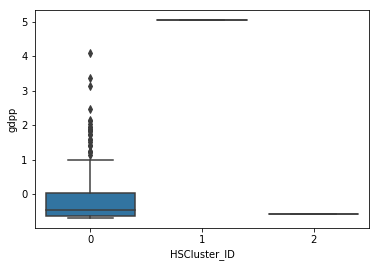

In [47]:
#Check if the Hierarchical Clusters are making sense by plotting the clusters against the gdpp, income and child mortality
sns.boxplot(x='HSCluster_ID', y='gdpp', data=cluster)

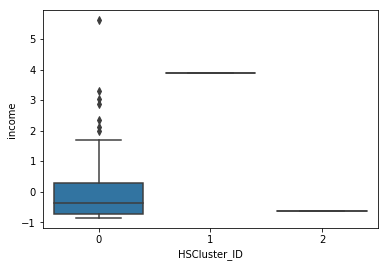

In [48]:
sns.boxplot(x='HSCluster_ID', y='income', data=cluster)

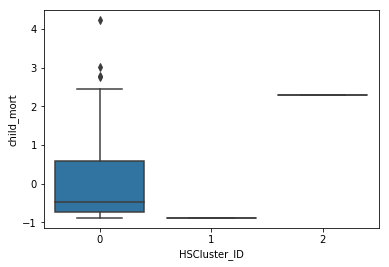

In [49]:
sns.boxplot(x='HSCluster_ID', y='child_mort', data=cluster)

### Plot clusters got through Complete Linkage Hierarchical Clustering against GDPP, Income and Child Mortality  

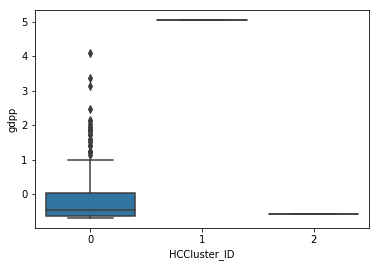

In [50]:
sns.boxplot(x='HCCluster_ID', y='gdpp', data=cluster)

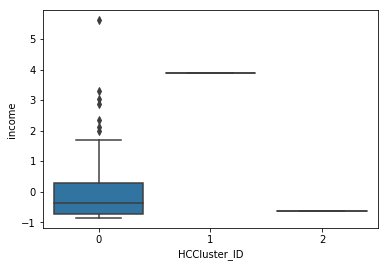

In [51]:
sns.boxplot(x='HCCluster_ID', y='income', data=cluster)

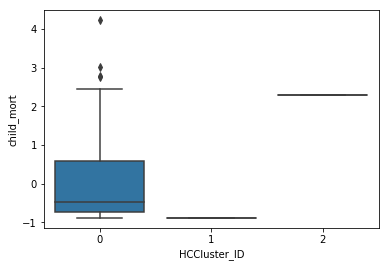

In [52]:
sns.boxplot(x='HCCluster_ID', y='child_mort', data=cluster)

- In Single as well as Complete linkage, we see that cluster 1 & 2 seem to have a single country and cluster 0 has the rest of the countries. In this scenario, it is better to go with the clusters obtained through K-Menas clustering

In [53]:
#Understanding the single countires that are in cluster 1 & cluster 2 above
x = cluster[cluster['HCCluster_ID']==1]
y = cluster[cluster['HCCluster_ID']==2]
print(x)
print(y)

       country  child_mort   exports    health   imports    income  inflation  \
91  Luxembourg   -0.882164  9.839814  3.954197  9.716681  3.878996  -0.394898   

    life_expec  total_fer      gdpp  cluster_id  HSCluster_ID  HCCluster_ID  
91    1.211786  -0.873224  5.036507           2             1             1  
     country  child_mort   exports    health   imports    income  inflation  \
113  Nigeria    2.281385 -0.381202 -0.522605 -0.421563 -0.624065   9.129718   

     life_expec  total_fer      gdpp  cluster_id  HSCluster_ID  HCCluster_ID  
113   -1.134121   1.916133 -0.581936           0             2             2  


- Here we see that Nigeria & Luxembourg are clsuter1 and cluster 2 respectively and all other countries are present in cluster 0

- From, the above results and boxplots we can conclude that in this case K-Means clustering is doing a better job compared to Hierarchical Clustering. So, we will take these results for getting our insights 

### Plotting the Principal Components and the clusters

In [54]:
#Plotting the clusters and the first two principal components
CountryName = pd.DataFrame(country.country)
country_pca_df = CountryName.join(country_pca_df)
country_pca_df.head()

,country,PC1,PC2,PC3,PC4,PC5,cluster_id,HSCluster_ID,HCCluster_ID
0,Afghanistan,-2.636338,1.472260,-0.548330,0.238302,0.061003,0,0,0
1,Albania,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,1,0,0
2,Algeria,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,1,0,0
3,Angola,-2.723472,2.174966,0.597397,0.417695,0.056694,0,0,0
4,Antigua and Barbuda,0.649103,-1.026404,-0.258645,-0.276882,0.077087,1,0,0


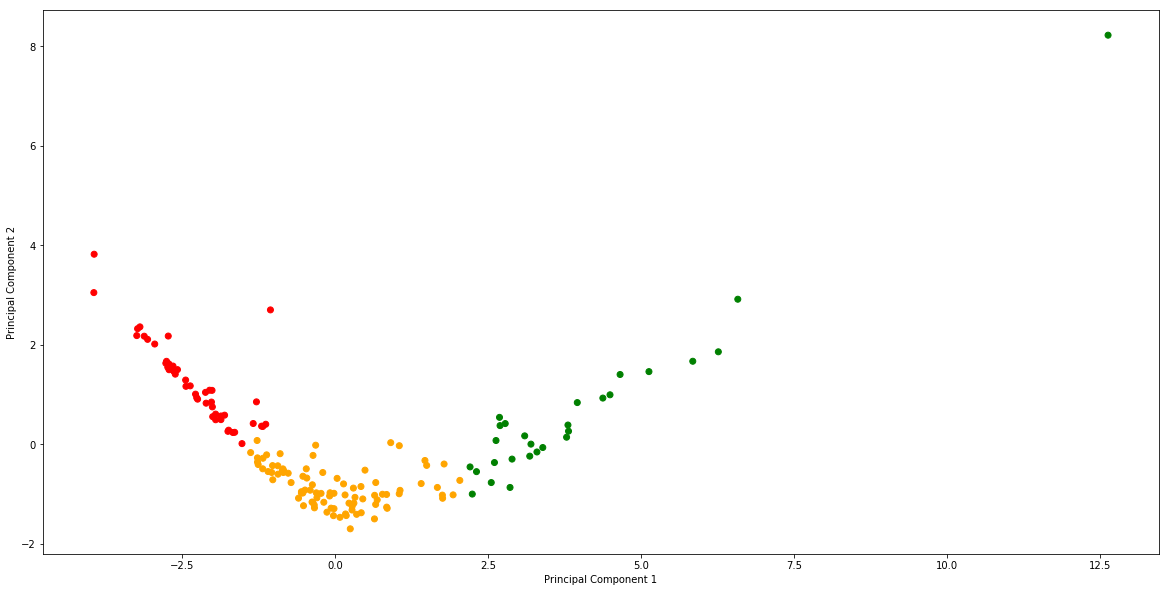

In [61]:
#Plotting the clusters and the first two principal components
PCAplot = country_pca_df.loc[:,['PC1','PC2','cluster_id']]
fig = plt.figure(figsize = (20,10))
colors = {0:'red', 1:'orange', 2:'green'}
plt.scatter(PCAplot['PC1'], PCAplot['PC2'], c=PCAplot['cluster_id'].apply(lambda x: colors[x]))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### Adding the K-Means clustering column back to the original dataset

In [56]:
#Importing the original dataset again
country_orig = pd.read_csv(r'C:\Users\Shravan\Desktop\Data\Clustering and PCA Assignment\Country-data.csv')
country_orig['health'] = (country_orig['health']*country_orig['gdpp'])/100
country_orig['imports'] = (country_orig['imports']*country_orig['gdpp'])/100
country_orig['exports'] = (country_orig['exports']*country_orig['gdpp'])/100
country_orig.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [57]:
#Joining the cluster columns to the original dataframe
country_orig_clus = country_orig.join(cluster['cluster_id'])
country_orig_clus.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1


### Plotting the GDPP and Income and checking how the clusters move

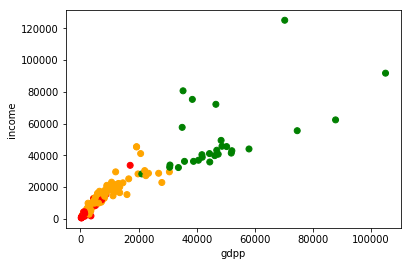

In [63]:
#PLotting the gdpp and income against the countries
colors = {0:'red', 1:'orange', 2:'green'}
plt.scatter(country_orig_clus['gdpp'], country_orig_clus['income'], c=country_orig_clus['cluster_id'].apply(lambda x: colors[x]))
plt.xlabel('gdpp')
plt.ylabel('income')
plt.show()

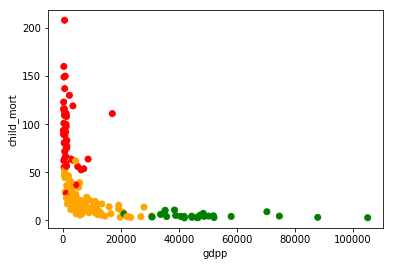

In [69]:
#PLotting the gdpp and child mortality  against the countries
colors = {0:'red', 1:'orange', 2:'green'}
plt.scatter(country_orig_clus['gdpp'], country_orig_clus['child_mort'], c=country_orig_clus['cluster_id'].apply(lambda x: colors[x]))
plt.xlabel('gdpp')
plt.ylabel('child_mort')
plt.show()

### Plotting the and different columns present in our dataset

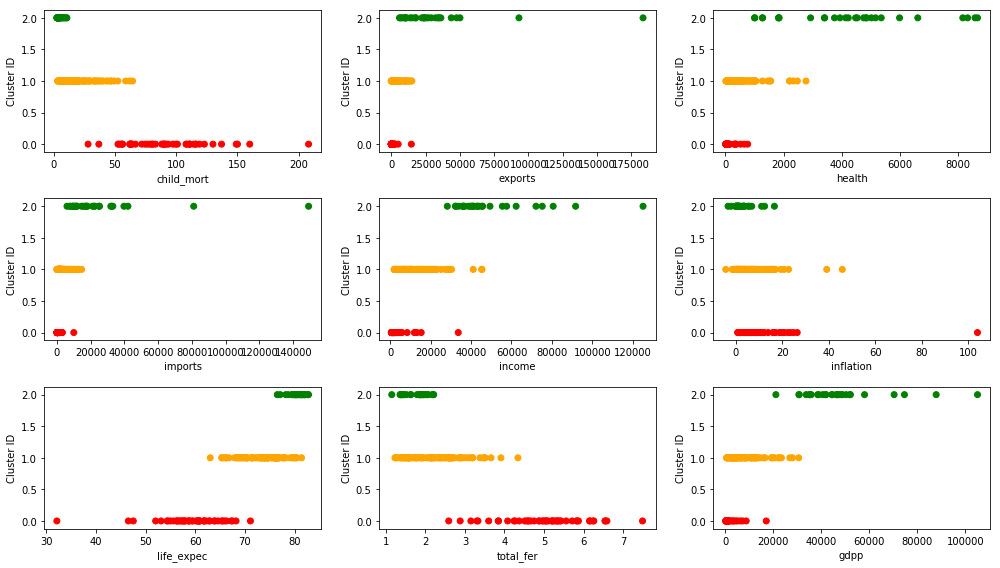

In [64]:
colors = {0:'red', 1:'orange', 2:'green'}
fig, axs = plt.subplots(3,3, figsize = (14,8))
Xaxis = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']

for i in range(0,9):
    plt.subplot(3,3,i+1)
    plt.scatter(country_orig_clus[Xaxis[i]], country_orig_clus['cluster_id'], c=country_orig_clus['cluster_id'].apply(lambda x: colors[x]))
    plt.xlabel(Xaxis[i])
    plt.ylabel('Cluster ID')

fig.tight_layout()
plt.show()

- Here, we see that the cluster in green represents the developed nations, orange represents the developing nations and the red represents under developed countries
- We see that green performs well in income, gdpp, life expectancy, exports, imports, health while red performs well in inflation, child mortality

### Number of countries that are falling under each cluster

In [65]:
country_orig_clus['cluster_id'].value_counts().sort_values(ascending=True)

2    28
0    48
1    91
Name: cluster_id, dtype: int64

In [70]:
#Finding the countries that are in cluster0 and which need help
cluster0 = country_orig_clus[country_orig_clus['cluster_id']==0]
cluster0

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553,0
3,Angola,119.0,2199.1900,100.6050,1514.370,5900,22.400,60.1,6.16,3530,0
17,Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758,0
21,Botswana,52.5,2768.6000,527.0500,3257.550,13300,8.920,57.1,2.88,6350,0
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575,0
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231,0
28,Cameroon,108.0,290.8200,67.2030,353.700,2660,1.910,57.3,5.11,1310,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.21,446,0
32,Chad,150.0,330.0960,40.6341,390.195,1930,6.390,56.5,6.59,897,0
36,Comoros,88.2,126.8850,34.6819,397.573,1410,3.870,65.9,4.75,769,0


In [74]:
#Sorting the countries in the order of high child mortality, high inflation, less spend on health and low GDPP
cluster0.sort_values(['child_mort','life_expec','health','inflation','gdpp'],ascending = [False, True, True, False,True],inplace=True)
cluster0

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
66,Haiti,208.0,101.2860,45.7442,428.314,1500,5.450,32.1,3.33,662,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.200,55.0,5.20,399,0
32,Chad,150.0,330.0960,40.6341,390.195,1930,6.390,56.5,6.59,897,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.21,446,0
97,Mali,137.0,161.4240,35.2584,248.508,1870,4.370,59.5,6.55,708,0
113,Nigeria,130.0,589.4900,118.1310,405.420,5150,104.000,60.5,5.84,2330,0
112,Niger,123.0,77.2560,17.9568,170.868,814,2.550,58.8,7.49,348,0
3,Angola,119.0,2199.1900,100.6050,1514.370,5900,22.400,60.1,6.16,3530,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.800,57.5,6.54,334,0
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575,0


### Top 10 countries that are in dire need of help
- The 10 countries that are in need of help are Haiti, Sierra Leone, Chad, Central African Republic, Mali, Nigeria, Niger, Angola, Congo, Burkina Faso, Guinea Bassau